# This project focusses on analysing the stock market data for a particular time period for some specific stocks. 

In [3]:
# Importing necessary libraries

# Pandas data reader allows us to read stock information directly from the internet

from pandas_datareader import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings

from mpl_finance import candlestick_ohlc

import plotly
import cufflinks as cf
cf.go_offline()

%matplotlib inline

Getting stock information of some banks using pandas datareader

In [4]:
# Specifying the data range for which to get the stock data

start = datetime.datetime(2009, 1, 1)
end = datetime.datetime(2019, 1, 1)

In [5]:
# Reading stock data using yahoo finance API

# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)



In [6]:
# Reading all data together in a list

df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [7]:
# Creating a list of ticker symbols in alphabetical order

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [8]:
# Concatenating bank dataframes together 

bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [9]:
# Checking head of bank stocks dataframe

bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2009-01-02 to 2019-01-02
Data columns (total 36 columns):
(BAC, High)         2517 non-null float64
(BAC, Low)          2517 non-null float64
(BAC, Open)         2517 non-null float64
(BAC, Close)        2517 non-null float64
(BAC, Volume)       2517 non-null float64
(BAC, Adj Close)    2517 non-null float64
(C, High)           2517 non-null float64
(C, Low)            2517 non-null float64
(C, Open)           2517 non-null float64
(C, Close)          2517 non-null float64
(C, Volume)         2517 non-null float64
(C, Adj Close)      2517 non-null float64
(GS, High)          2517 non-null float64
(GS, Low)           2517 non-null float64
(GS, Open)          2517 non-null float64
(GS, Close)         2517 non-null float64
(GS, Volume)        2517 non-null float64
(GS, Adj Close)     2517 non-null float64
(JPM, High)         2517 non-null float64
(JPM, Low)          2517 non-null float64
(JPM, Open)         2517 non-null f

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [11]:
# Checking head of bank stocks dataframe

bank_stocks.head()

Bank Ticker    BAC                                                       C  \
Stock Info    High    Low   Open  Close       Volume  Adj Close       High   
Date                                                                         
2009-01-02   14.57  13.71  13.92  14.33   86580700.0  12.969933  71.599998   
2009-01-05   14.55  13.89  14.38  13.98   93640500.0  12.653151  75.000000   
2009-01-06   14.81  14.07  14.27  14.28  111015400.0  12.924679  75.900002   
2009-01-07   14.13  13.61  14.11  13.71  112810000.0  12.408772  74.400002   
2009-01-08   13.99  13.35  13.82  13.54   93943500.0  12.254910  73.400002   

Bank Ticker                                     ...             MS             \
Stock Info         Low       Open      Close    ...           Open      Close   
Date                                            ...                             
2009-01-02   67.500000  68.699997  71.400002    ...      16.010000  16.990000   
2009-01-05   70.300003  71.199997  70.800003    ...      16.799999  17.620001   
2009-01-06   72.800003  72.900002  74.599998    ...      18.070000  19.580000   
2009-01-07   70.800003  72.199997  71.500000    ...      19.070000  18.100000   
2009-01-08   69.800003  71.000000  71.599998    ...      17.900000  18.820000   

Bank Ticker                               WFC                        \
Stock Info       Volume  Adj Close       High        Low       Open   
Date                                                                  
2009-01-02   20238000.0  14.418042  30.469999  28.670000  29.180000   
2009-01-05   25421400.0  14.952674  29.790001  28.059999  29.740000   
2009-01-06   38858500.0  16.615959  28.820000  27.290001  28.670000   
2009-01-07   30848100.0  15.360011  27.180000  23.620001  27.080000   
2009-01-08   21116300.0  15.971018  26.070000  25.110001  25.360001   

Bank Ticker                                    
Stock Info       Close      Volume  Adj Close  
Date                                           
2009-01-02   30.000000  36522300.0  23.018955  
2009-01-05   28.059999  43614200.0  21.530401  
2009-01-06   27.540001  54222900.0  21.131411  
2009-01-07   25.870001  52631000.0  19.850021  
2009-01-08   25.719999  52580100.0  19.734917  

[5 rows x 36 columns]

In [12]:
# Exploratory Data Analysis

# Maximum closing price of each stock during the entire period

bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     32.840000
C       80.080002
GS     273.380005
JPM    118.769997
MS      58.910000
WFC     65.930000
dtype: float64

In [13]:
# Creating new dataframe returns which will display the average return of the stock during the entire period

returns = pd.DataFrame()

In [14]:
# Creating a new dataframe having returns for each stock

for stock in tickers:
    returns[stock+' Return'] = bank_stocks[stock]['Close'].pct_change()    

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,-0.024424,-0.008403,0.023283,-0.066986,0.037081,-0.064667
2009-01-06,0.021459,0.053672,-0.000788,0.021538,0.111237,-0.018532
2009-01-07,-0.039916,-0.041555,-0.047458,-0.059906,-0.075587,-0.060639
2009-01-08,-0.012400,0.001399,0.010769,-0.030972,0.039779,-0.005798


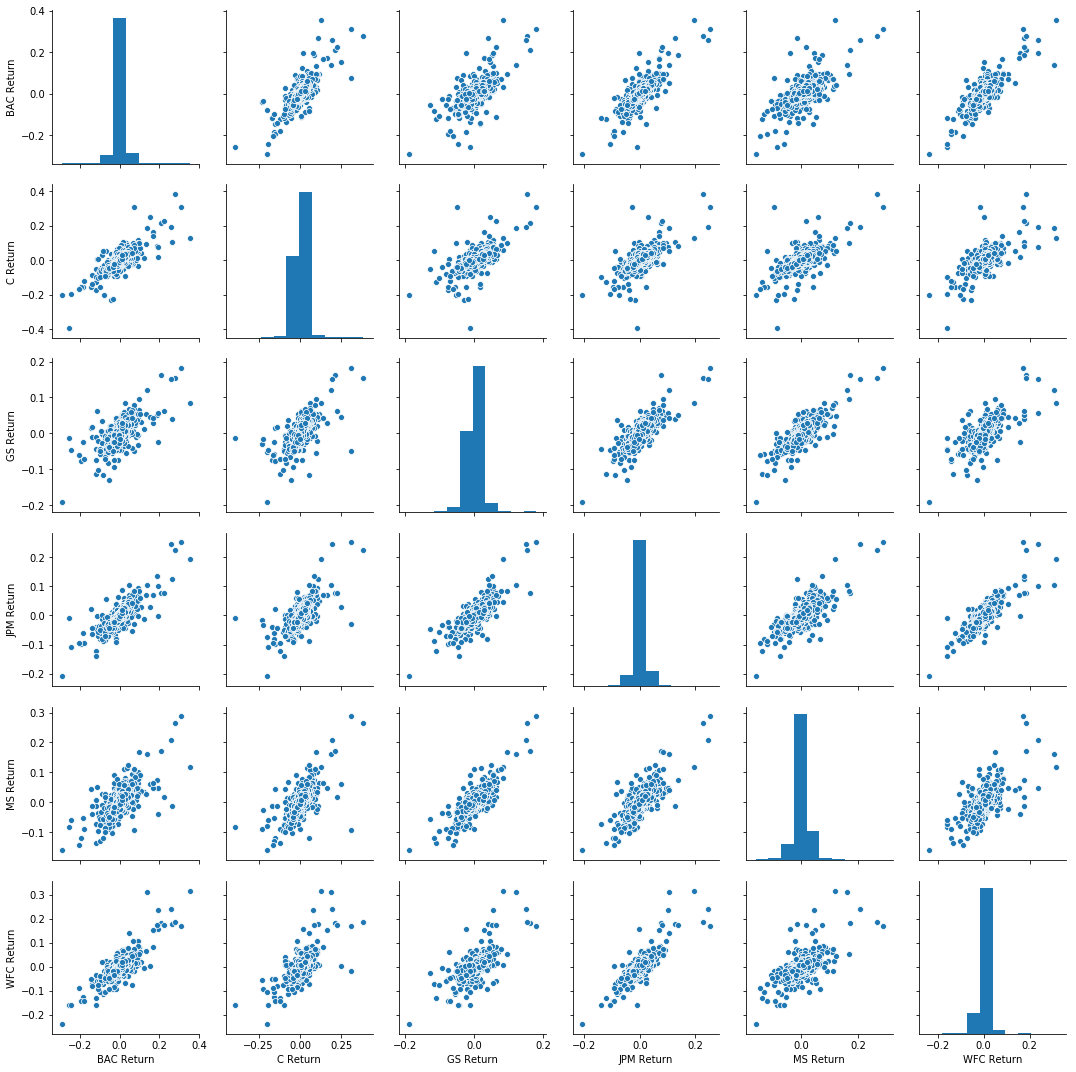

In [15]:
# Creating pairplot for returns dataframe

import seaborn as sns
sns.pairplot(returns[1:])

In [16]:
# Worst drop dates of individual stocks

returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2009-01-20
WFC Return   2009-01-20
dtype: datetime64[ns]

In [17]:
# Best single day returns

returns.idxmax()

BAC Return   2009-04-09
C Return     2009-03-10
GS Return    2009-01-21
JPM Return   2009-01-21
MS Return    2009-01-21
WFC Return   2009-04-09
dtype: datetime64[ns]

In [18]:
# Standard deviation of individual stocks

returns.std() # BAC riskiest

BAC Return    0.031677
C Return      0.031381
GS Return     0.019850
JPM Return    0.022293
MS Return     0.025903
WFC Return    0.025700
dtype: float64

In [19]:
# Riskiest stock based on std in year 2015 is BAC i.e. volatility has been maximum 

returns.loc['2017-01-01':'2017-12-31'].std() 

BAC Return    0.013507
C Return      0.011129
GS Return     0.012423
JPM Return    0.010176
MS Return     0.013184
WFC Return    0.011178
dtype: float64

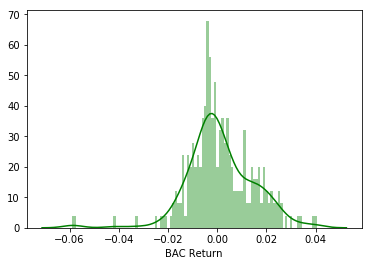

In [20]:
# Creating a distplot using seaborn of the 2015 returns for BAC **

warnings.filterwarnings(action='ignore')

sns.distplot(returns.loc['2017-01-01':'2017-12-31']['BAC Return'],color='green',bins=100)

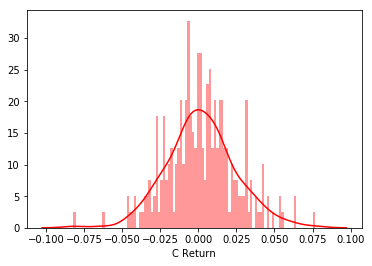

In [21]:
# Creating a distplot using seaborn of the 2012 returns for Citi **

sns.distplot(returns.loc['2012-01-01':'2012-12-31']['C Return'],color='red',bins=100)

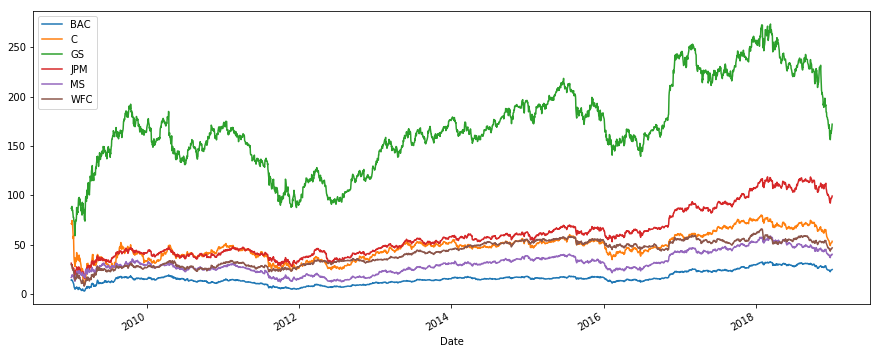

In [22]:
# Line plot showing closing price of each stock for the entire duration

for stock in tickers:
    bank_stocks[stock]['Close'].plot(figsize=(15,6),label=stock)
plt.legend()

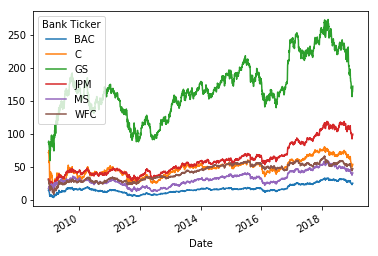

In [23]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [24]:
# Interactive plot using plotly

bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

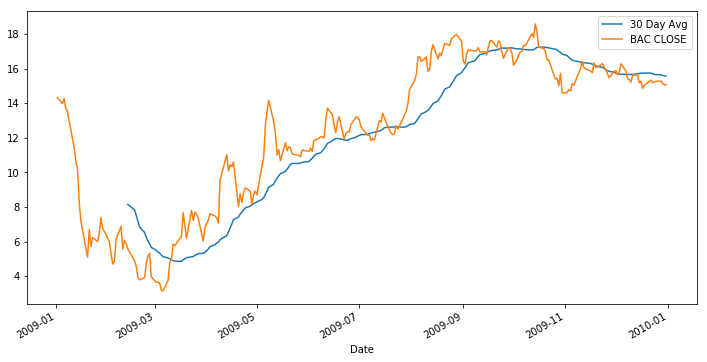

In [25]:
# Calculating rolling 30 day moving average for BAC stock

plt.figure(figsize=(12,6))
BAC['Close'].loc['2009-01-01':'2010-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2009-01-01':'2010-01-01'].plot(label='BAC CLOSE')
plt.legend()


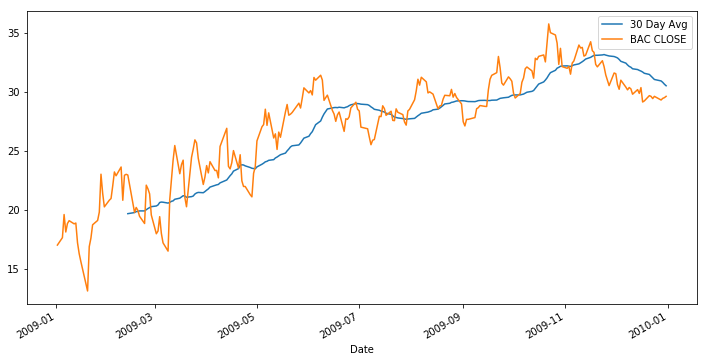

In [26]:
# Calculating rolling 30 day moving average for MS stock

plt.figure(figsize=(12,6))
MS['Close'].loc['2009-01-01':'2010-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
MS['Close'].loc['2009-01-01':'2010-01-01'].plot(label='BAC CLOSE')
plt.legend()

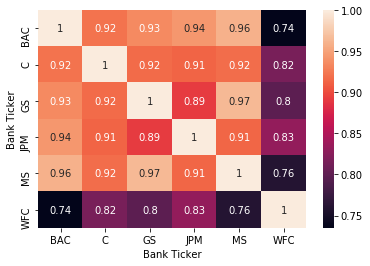

In [27]:
# Creating heatmap of the correlation between stock closing price

sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

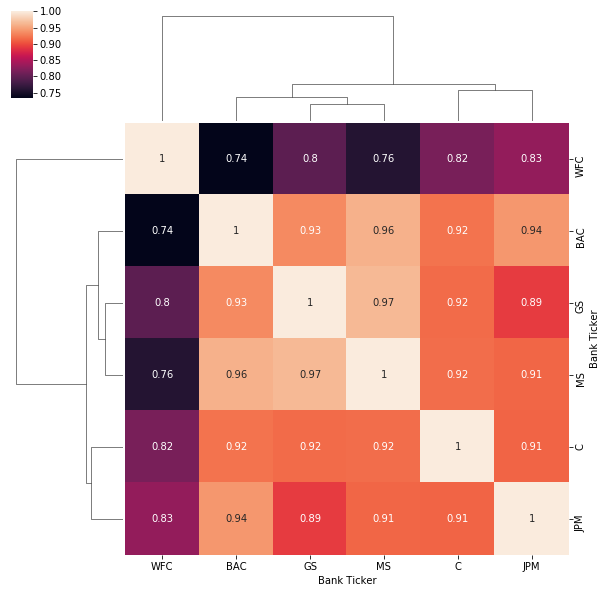

In [28]:
# Using seaborn's clustermap to cluster the correlations together 

sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [29]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [30]:
## Creating some technical plots based on cufflinks library

# Plot kind = Candle

BAC[['Open', 'High', 'Low', 'Close']].loc['2012-01-01':'2013-01-01'].iplot(kind='candle')

In [31]:
# Creating simple moving averages plot of Morgan Stanley for the year 2015

MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [32]:
# Creating a Bollinger Band Plot for Bank of America for the year 2015.

BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

In [36]:
## Trying to predict closing price using linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
model = LinearRegression()

features = [('BAC', 'High'),('BAC', 'Low'),('BAC', 'Open'),('BAC', 'Volume')]

df_train = bank_stocks[0:2000]
df_test = bank_stocks[2000:]

X = df_train[features]
X_test = df_test[features]
y = df_train['BAC', 'Close']
y_test = df_test['BAC', 'Close']

model.fit(X, y)
pred = model.predict(X_test)

#MAE = sum(abs(pred - y_test))/len(pred)
MAE = mean_absolute_error(y_test,pred)
MSE = mean_squared_error(y_test,pred)

print("MAE: ",MAE)
print("MSE: ",MSE)
print("Score: ",model.score(X, y))


MAE:  0.11532234710514204
MSE:  0.0231881423625409
Score:  0.999055469430857


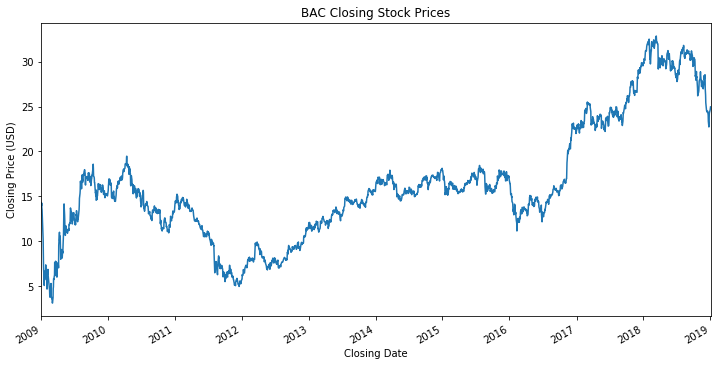

In [37]:
title='BAC Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = BAC['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [38]:
BAC.loc['2017-01-01':'2017-03-01']['Close'].min()

22.049999237060547